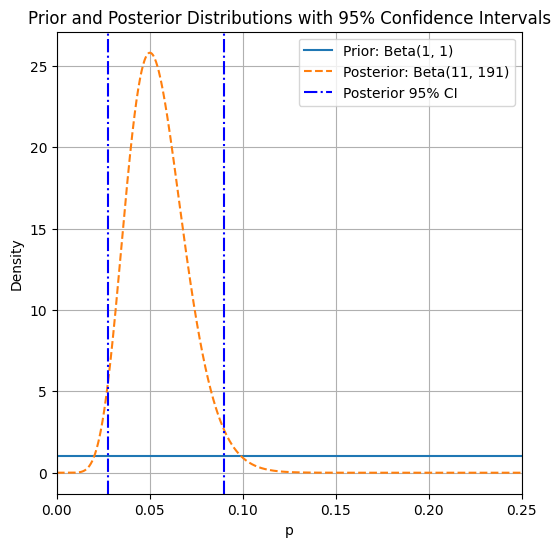

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the parameters
a = 1  # Adjust as needed
b = 1  # Adjust as needed
n = 200
x = 10

# Generate values between 0 and 0.25 for p
p_values = np.linspace(0, 0.25, 1000)

# Compute the prior and posterior densities
prior = beta.pdf(p_values, a, b)
posterior = beta.pdf(p_values, a + x, b + n - x)

# Calculate the 95% confidence intervals for prior and posterior
prior_lower, prior_upper = beta.ppf([0.025, 0.975], a, b)
posterior_lower, posterior_upper = beta.ppf([0.025, 0.975], a + x, b + n - x)

# Plot the prior and posterior
plt.figure(figsize=(6, 6))
plt.plot(p_values, prior, label=f'Prior: Beta({a}, {b})')
plt.plot(p_values, posterior, label=f'Posterior: Beta({a + x}, {b + n - x})', linestyle='--')

# Add vertical lines for the confidence intervals

plt.axvline(posterior_lower, color='blue', linestyle='-.', label='Posterior 95% CI')
plt.axvline(posterior_upper, color='blue', linestyle='-.')

# Set x-axis limits
plt.xlim(0, 0.25)

plt.title('Prior and Posterior Distributions with 95% Confidence Intervals')
plt.xlabel('p')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

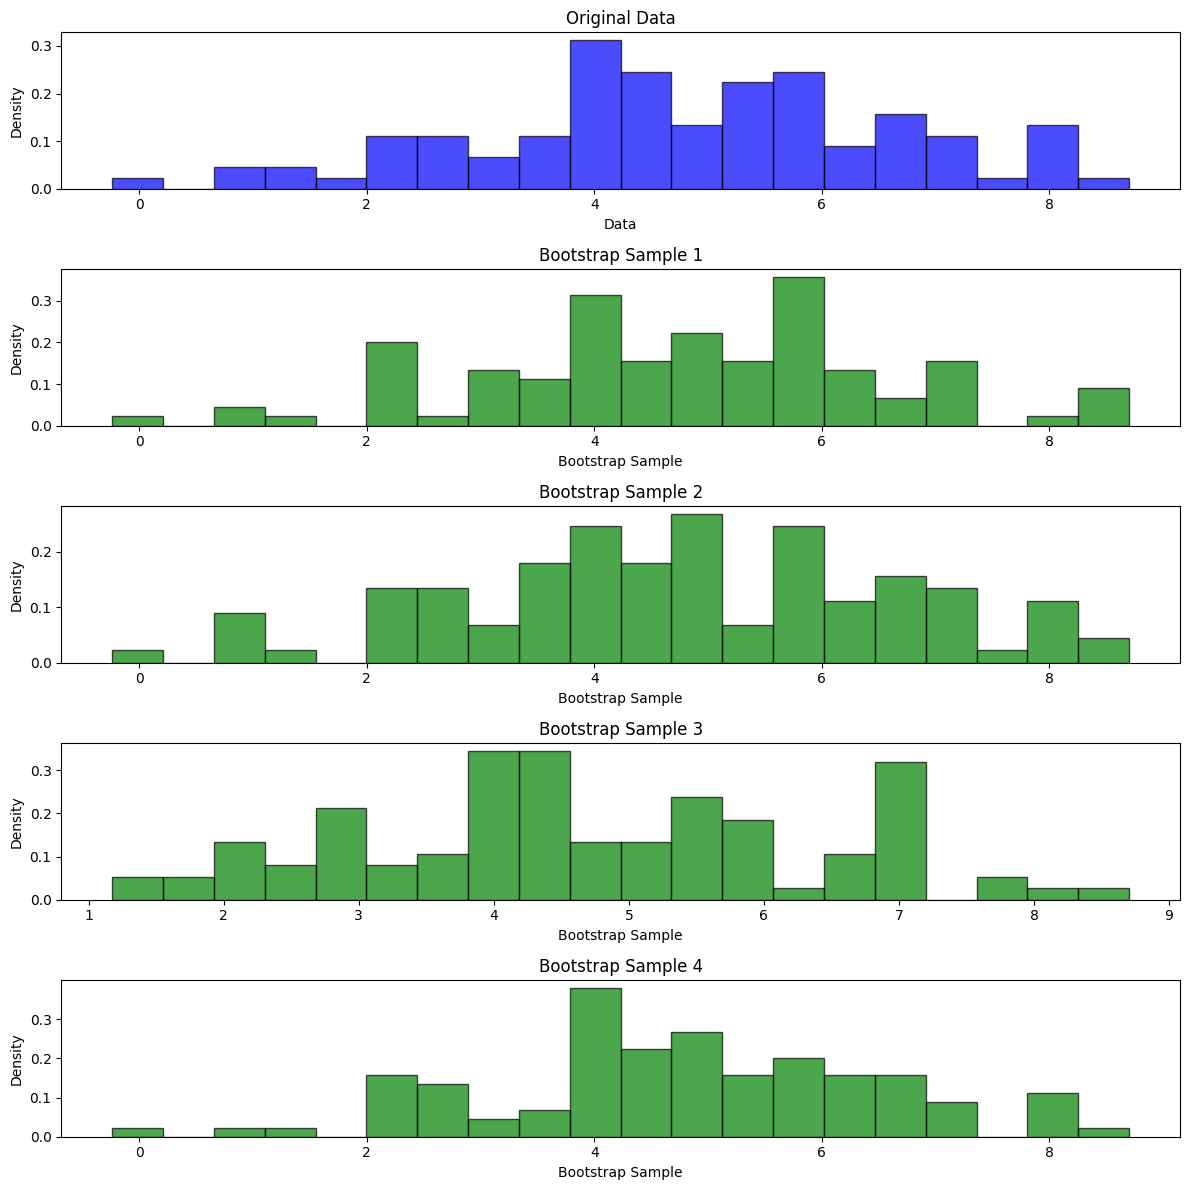

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated data
np.random.seed(42)
observed_data = np.random.normal(loc=5, scale=2, size=100)

# Number of bootstrap samples
num_bootstrap_samples = 4

# Plotting
plt.figure(figsize=(12, 12))
plt.subplot(num_bootstrap_samples + 1, 1, 1)
plt.hist(observed_data, bins=20, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Original Data')

# Perform bootstrapping and plot bootstrapped samples
for i in range(num_bootstrap_samples):
    bootstrap_sample = np.random.choice(observed_data, size=len(observed_data), replace=True)

    plt.subplot(num_bootstrap_samples + 1, 1, i + 2)
    plt.hist(bootstrap_sample, bins=20, density=True, alpha=0.7, color='green', edgecolor='black')
    plt.xlabel('Bootstrap Sample')
    plt.ylabel('Density')
    plt.title(f'Bootstrap Sample {i + 1}')

plt.tight_layout()
plt.show()


95% bootstrap interval: (0.020, 0.080)


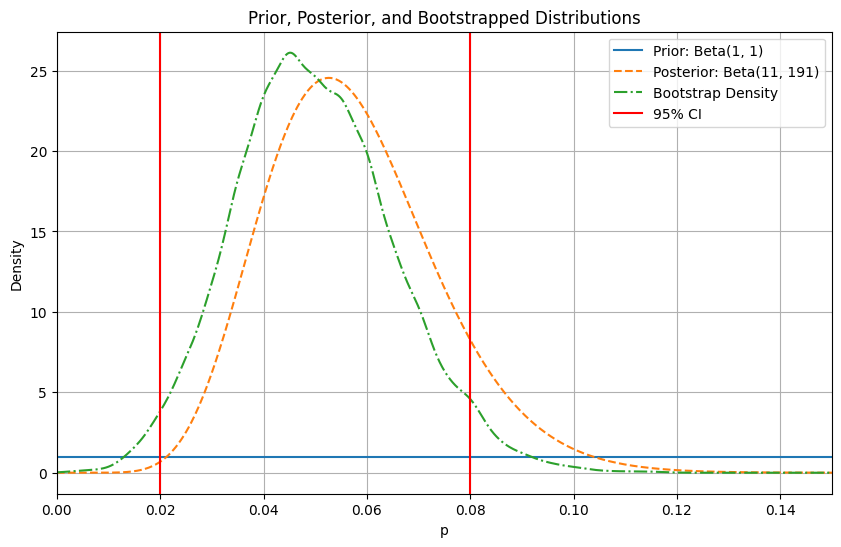

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, gaussian_kde

# Original Data
x = np.concatenate([np.ones(10), np.zeros(190)])  # 10 successes, 190 failures
n = len(x)

# Bootstrap Distribution
M = 5000  # number of bootstrap samples
p = np.zeros(M)  # initialize vector for test statistic
np.random.seed(201910)  # set random seed

for m in range(M):
    xboot = np.random.choice(x, size=n, replace=True)  # bootstrap sample
    p[m] = np.mean(xboot)  # calculate test statistic (proportion of successes)

# Bootstrap Percentile based confidence Intervals
lower, upper = np.percentile(p, [2.5, 97.5])
print(f"95% bootstrap interval: ({lower:.3f}, {upper:.3f})")

# Plotting
p_values = np.linspace(0, 0.25, 1000)
prior = beta.pdf(p_values, 1, 1)
posterior = beta.pdf(p_values, 1 + 10, 1 + 190 - 10)

# Bootstrapped density
density = gaussian_kde(p)
bootstrap_density = density(p_values)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(p_values, prior, label=f'Prior: Beta(1, 1)')
plt.plot(p_values, posterior, label=f'Posterior: Beta(11, 191)', linestyle='--')
plt.plot(p_values, bootstrap_density, label='Bootstrap Density', linestyle='-.')
plt.axvline(lower, color='red', linestyle='-', label='95% CI')
plt.axvline(upper, color='red', linestyle='-')
plt.xlim(0, 0.15)
plt.title('Prior, Posterior, and Bootstrapped Distributions')
plt.xlabel('p')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

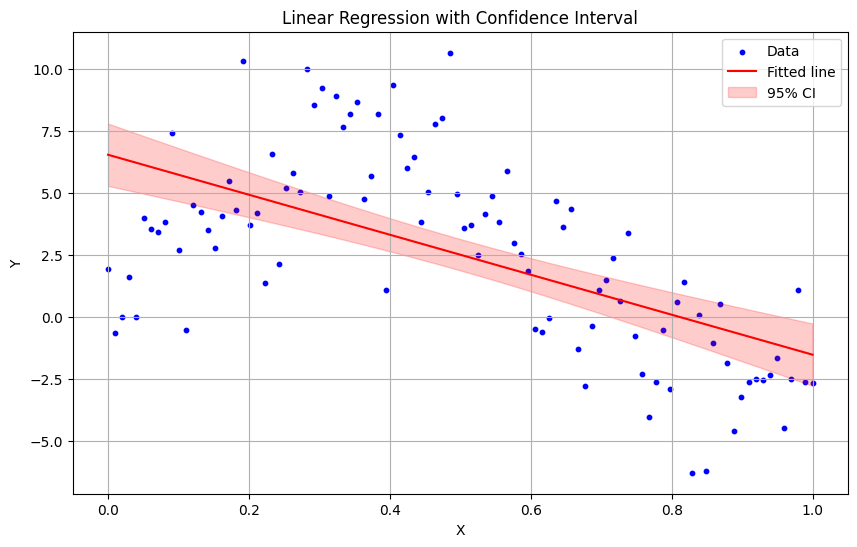

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

#-- Define basic functions to simulate example data

# Function (2)
def f(x):
    true_y = 1 + 2*x + 5*np.sin(5*x)
    return true_y

# Function (3)
def sim_y(x, sd):
    n = len(x)
    error = np.random.normal(0, sd, n)  # Gaussian noise
    y = f(x) + error
    return y

# Simulate data
n = 100
sd = 2 # Adjust as necessary
x_data = np.linspace(0, 1, 100)
y_data = sim_y(x_data, sd)

# Fit linear regression
X = sm.add_constant(x_data)  # Add a constant to the predictor
model = sm.OLS(y_data, X)
result = model.fit()

# Predict y values and confidence intervals for new data
predictions = result.get_prediction(X)
frame = predictions.summary_frame(alpha=0.05)  # 95% confidence

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, s=10, color='blue', label='Data')
plt.plot(x_data, result.fittedvalues, 'r', label='Fitted line')
plt.fill_between(x_data, frame['mean_ci_lower'], frame['mean_ci_upper'], color='r', alpha=0.2, label='95% CI')
plt.title('Linear Regression with Confidence Interval')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Assuming you've already defined sim_x, sim_y, and f functions

# Generate data
n = 100
sd = 0.5
x_data = sim_x(n)
y_data = sim_y(x_data, sd)
data_train = pd.DataFrame({'x': x_data.ravel(), 'y': y_data.ravel()})

# Fit the original model
X = sm.add_constant(data_train['x'])
model = sm.OLS(data_train['y'], X)
results = model.fit()

# Normal theory ellipse
cov_matrix = results.cov_params()
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
order = eigenvalues.argsort()[::-1]
eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]
width, height = 2 * np.sqrt(eigenvalues)
angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))

# Bootstrap for coefficients
M = 5000
np.random.seed(321)
beta_list = []

for m in range(M):
    ind = np.random.choice(data_train.index, size=len(data_train), replace=True)
    data_boot = data_train.iloc[ind]

    X_boot = sm.add_constant(data_boot['x'])
    model_boot = sm.OLS(data_boot['y'], X_boot)
    results_boot = model_boot.fit()

    beta_list.append(results_boot.params)

beta_df = pd.DataFrame(beta_list)
cov_matrix_boot = beta_df.cov()
eigenvalues_boot, eigenvectors_boot = np.linalg.eigh(cov_matrix_boot)
order_boot = eigenvalues_boot.argsort()[::-1]
eigenvalues_boot, eigenvectors_boot = eigenvalues_boot[order_boot], eigenvectors_boot[:, order_boot]
width_boot, height_boot = 2 * np.sqrt(eigenvalues_boot)
angle_boot = np.degrees(np.arctan2(*eigenvectors_boot[:, 0][::-1]))

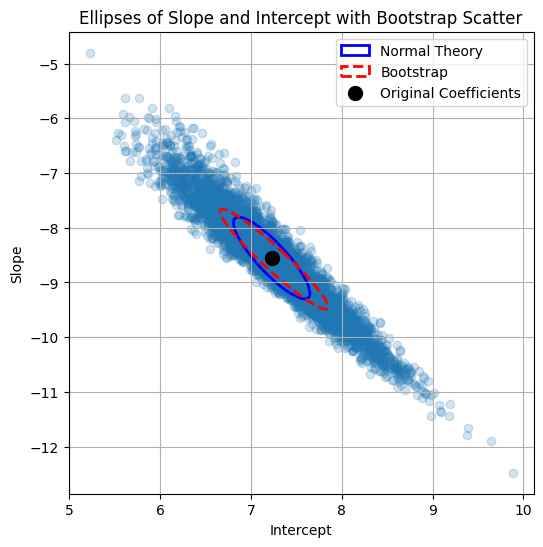

In [11]:
# Plotting
fig, ax = plt.subplots(figsize=(6, 6))

# Scatter of bootstrap results
ax.scatter(beta_df['const'], beta_df['x'], alpha=0.2)

ellipse = Ellipse(xy=(results.params['const'], results.params['x']),
                  width=width, height=height, angle=angle,
                  edgecolor='blue', fc='None', lw=2, label="Normal Theory")
ax.add_patch(ellipse)

ellipse_boot = Ellipse(xy=(np.mean(beta_df['const']), np.mean(beta_df['x'])),
                       width=width_boot, height=height_boot, angle=angle_boot,
                       edgecolor='red', fc='None', lw=2, linestyle='--', label="Bootstrap")
ax.add_patch(ellipse_boot)

# Original coefficients
ax.scatter(results.params['const'], results.params['x'], color='black', s=100, label='Original Coefficients')

ax.set_title('Ellipses of Slope and Intercept with Bootstrap Scatter')
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.legend()
plt.grid(True)
plt.show()

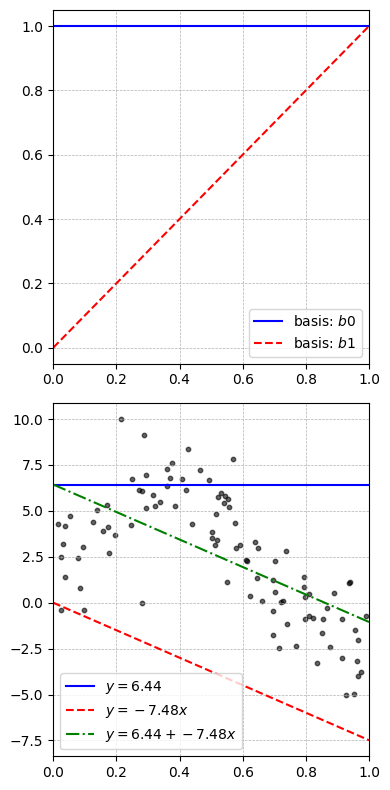

In [50]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming sim_x, sim_y, and f have been previously defined

# Generate data
n = 100
sd = 2
x_data = sim_x(n)
y_data = sim_y(x_data, sd)
data_train = pd.DataFrame({'x': x_data.ravel(), 'y': y_data.ravel()})

# Fit linear regression model
X = sm.add_constant(data_train['x'])
model = sm.OLS(data_train['y'], X)
results = model.fit()
b0, b1 = results.params['const'], results.params['x']

# Generate values for plotting
x_vals = np.linspace(0, 1, 200)
y_b0 = np.full_like(x_vals, b0)
y_b1x = b1 * x_vals
y_fit = b0 + b1 * x_vals

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(4, 8))

# Top plot
axes[0].plot(x_vals, np.full_like(x_vals, 1), label='basis: $b0$', color='blue')
axes[0].plot(x_vals, x_vals, label='basis: $b1$', linestyle='--', color='red')
axes[0].set_xlim(0, 1)
axes[0].legend()
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid

# Bottom plot
axes[1].plot(x_vals, y_b0, label=f'$y = {b0:.2f}$', color='blue')
axes[1].plot(x_vals, y_b1x, linestyle='--', color='red', label=f'$y = {b1:.2f}x$')
axes[1].plot(x_vals, y_fit, linestyle='-.', color='green', label=f'$y = {b0:.2f} + {b1:.2f}x$')
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid

axes[1].scatter(data_train['x'], data_train['y'], color='black', alpha=0.6, s=10)
axes[1].set_xlim(0, 1)
axes[1].legend()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


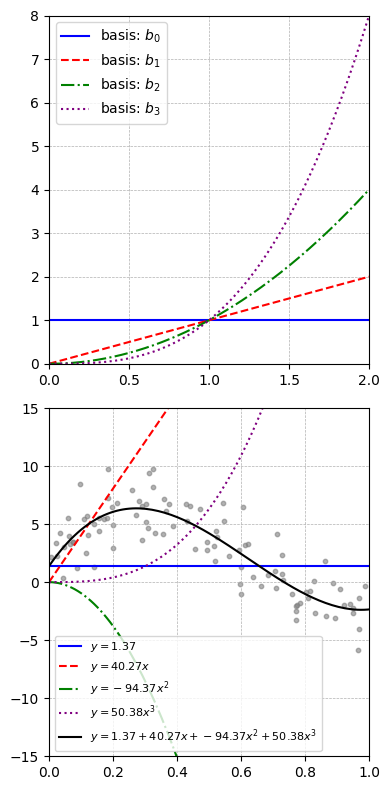

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate Data
np.random.seed(42)
n = 100
x = sim_x(n)
y = sim_y(x, 2)
data_train = pd.DataFrame({'x': x.flatten(), 'y': y.flatten()})

# Polynomial features
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(data_train[['x']])

# Fit polynomial regression
linreg = LinearRegression().fit(X_poly, data_train['y'])

# Coefficients
b0 = linreg.intercept_
b1, b2, b3 = linreg.coef_[1], linreg.coef_[2], linreg.coef_[3]

# Create values for plotting
x_vals = np.linspace(0, 2, 200).reshape(-1, 1)
X_vals_poly = poly.transform(x_vals)

# Predicted values
y_vals_fit = linreg.predict(X_vals_poly)
y_b0 = np.full_like(x_vals, b0)
y_b1x = b1 * x_vals
y_b2x2 = b2 * x_vals**2
y_b3x3 = b3 * x_vals**3

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(4, 8), dpi=100)

# Top plot
axes[0].plot(x_vals, np.full_like(x_vals, 1), label='basis: $b_0$', color='blue')
axes[0].plot(x_vals, x_vals, label='basis: $b_1$', linestyle='--', color='red')
axes[0].plot(x_vals, x_vals**2, label='basis: $b_2$', linestyle='-.', color='green')
axes[0].plot(x_vals, x_vals**3, label='basis: $b_3$', linestyle=':', color='purple')
axes[0].set_xlim(0, 2)
axes[0].set_ylim(0, 8)
axes[0].legend()
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Bottom plot
axes[1].plot(x_vals, y_b0, label=f'$y = {b0:.2f}$', color='blue')
axes[1].plot(x_vals, y_b1x, linestyle='--', color='red', label=f'$y = {b1:.2f}x$')
axes[1].plot(x_vals, y_b2x2, linestyle='-.', color='green', label=f'$y = {b2:.2f}x^2$')
axes[1].plot(x_vals, y_b3x3, linestyle=':', color='purple', label=f'$y = {b3:.2f}x^3$')
polynomial_eq = f"$y = {b0:.2f} + {b1:.2f}x + {b2:.2f}x^2 + {b3:.2f}x^3$"
axes[1].plot(x_vals, y_vals_fit, color='black', label=polynomial_eq)

axes[1].scatter(data_train['x'], data_train['y'], color='gray', alpha=0.6, s=10)
axes[1].set_xlim(0, 1)
axes[1].set_ylim(-15, 15)
axes[1].legend()
axes[1].legend(fontsize=8)  # Adjusted font size here
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)


plt.tight_layout()
plt.show()

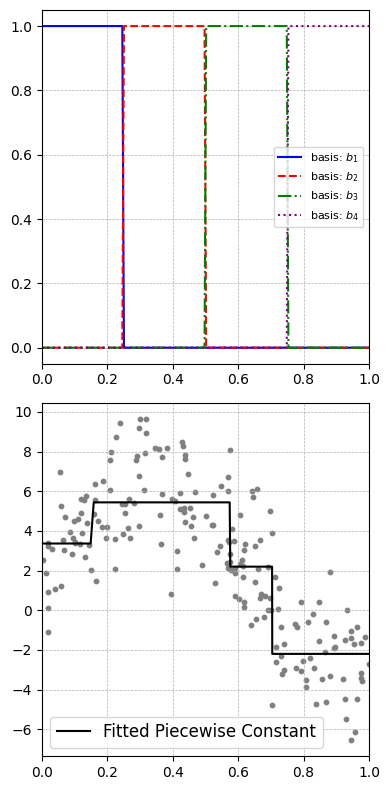

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Simulated Data
np.random.seed(0)
n = 200
x = sim_x(n)
y = sim_y(x, 2)

# Create piecewise constant regression model
model = DecisionTreeRegressor(max_leaf_nodes=4)  # We have p=4 regions
model.fit(x, y)

# Predictions for piecewise constant regression
y_pred = model.predict(x)

# Values for plotting the pre-specified basis functions
x_vals = np.linspace(0, 1, 200)

# Top plot
# Constructing the four regions as piecewise constants
y_r1 = np.piecewise(x_vals, [x_vals < 0.25, (x_vals >= 0.25) & (x_vals < 0.5), (x_vals >= 0.5) & (x_vals < 0.75), x_vals >= 0.75], [1, 0, 0, 0])
y_r2 = np.piecewise(x_vals, [x_vals < 0.25, (x_vals >= 0.25) & (x_vals < 0.5), (x_vals >= 0.5) & (x_vals < 0.75), x_vals >= 0.75], [0, 1, 0, 0])
y_r3 = np.piecewise(x_vals, [x_vals < 0.25, (x_vals >= 0.25) & (x_vals < 0.5), (x_vals >= 0.5) & (x_vals < 0.75), x_vals >= 0.75], [0, 0, 1, 0])
y_r4 = np.piecewise(x_vals, [x_vals < 0.25, (x_vals >= 0.25) & (x_vals < 0.5), (x_vals >= 0.5) & (x_vals < 0.75), x_vals >= 0.75], [0, 0, 0, 1])

fig, axes = plt.subplots(2, 1, figsize=(4, 8))

# Plotting top subplot
axes[0].plot(x_vals, y_r1, label='basis: $b_1$', color='blue')
axes[0].plot(x_vals, y_r2, label='basis: $b_2$', linestyle='--', color='red')
axes[0].plot(x_vals, y_r3, label='basis: $b_3$', linestyle='-.', color='green')
axes[0].plot(x_vals, y_r4, label='basis: $b_4$', linestyle=':', color='purple')
axes[0].legend(fontsize=8)
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[0].set_xlim(0, 1)

# Plotting bottom subplot
axes[1].scatter(x, y, color='gray', s=10)
sorted_x = np.sort(x, axis=0)
axes[1].plot(sorted_x, y_pred[np.argsort(x, axis=0)], color='black', label="Fitted Piecewise Constant")
axes[1].set_xlim(0, 1)
axes[1].legend(fontsize=12)
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


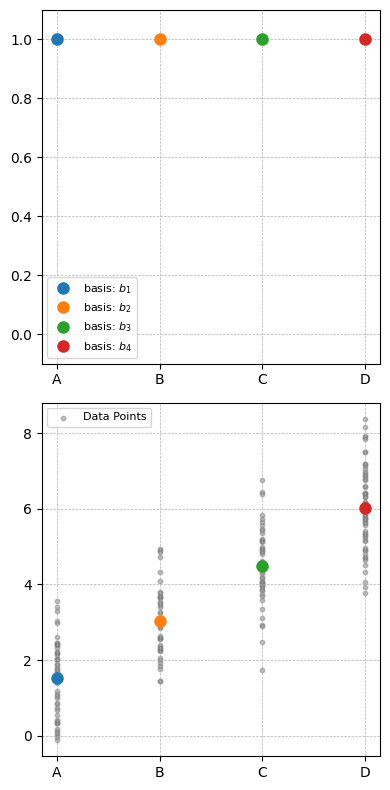

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Simulated Data
np.random.seed(0)
n = 200
categories = ['A', 'B', 'C', 'D']
x = np.random.choice(categories, n)
y = np.array([1.5 + np.random.normal() if cat == 'A' else
              3 + np.random.normal() if cat == 'B' else
              4.5 + np.random.normal() if cat == 'C' else
              6 + np.random.normal() for cat in x])

# One-hot encoding
df = pd.get_dummies(x, prefix='x', drop_first=True)  # Dummy encoding

# Linear regression with dummy encoding
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(df, y)

# Values for plotting the basis functions
x_vals = categories
y_vals_onehot = [[1, 0, 0, 0],
                [0, 1, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1]]

y_vals_dummy = [[0, 0, 0],
                [1, 0, 0],
                [0, 1, 0],
                [0, 0, 1]]

fig, axes = plt.subplots(2, 1, figsize=(4, 8))

# Plotting top subplot for One-Hot Encoding
for i, (x_val, y_val) in enumerate(zip(x_vals, y_vals_onehot)):
    axes[0].plot(x_val, y_val[i], 'o', label=f'basis: $b_{i+1}$', markersize=8)
axes[0].legend(fontsize=8)
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[0].set_ylim(-0.1, 1.1)

# Plotting bottom subplot for dummy encoding regression
for cat in categories:
    pred_val = model.intercept_ if cat == 'A' else model.predict([df[df['x_' + cat] == 1].iloc[0]])[0]
    axes[1].plot(cat, pred_val, 'o', markersize=8)
axes[1].scatter(x, y, color='gray', s=10, alpha=0.5, label="Data Points")
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[1].legend(fontsize=8)

plt.tight_layout()
plt.show()


The variable x is categorical and takes on one of the values in {c1,c2,...,cp}{c1​,c2​,...,cp​}. We will represent each category by a one-hot encoding (or dummy variable encoding) with p=4p=4 possible values: A, B, C, and D.

The one-hot encoding will be:
x=A→(1,0,0,0)x=A→(1,0,0,0)
x=B→(0,1,0,0)x=B→(0,1,0,0)
x=C→(0,0,1,0)x=C→(0,0,1,0)
x=D→(0,0,0,1)x=D→(0,0,0,1)

However, in the context of regression, to avoid multicollinearity, we often drop one of these dummy variables. This is called "dummy variable encoding" where:
x=A→(0,0,0)x=A→(0,0,0)
x=B→(1,0,0)x=B→(1,0,0)
x=C→(0,1,0)x=C→(0,1,0)
x=D→(0,0,1)x=D→(0,0,1)
Here, category A is taken as the reference category.

The representation then becomes:
f^(x)=β^0+β^11(x=c1)+β^21(x=c2)+β^31(x=c3)f^​(x)=β^​0​+β^​1​1(x=c1​)+β^​2​1(x=c2​)+β^​3​1(x=c3​).

B-splines, or basis splines, are a family of piecewise polynomial functions that can span across multiple intervals, making them particularly useful for regression, interpolation, and smoothing tasks.

Here's a simple way to visualize the B-splines for different degrees with evenly spaced knots:

    We'll choose 10 knots evenly spaced between 0 and 1.
    Generate and visualize B-splines for degrees 0 through 3.

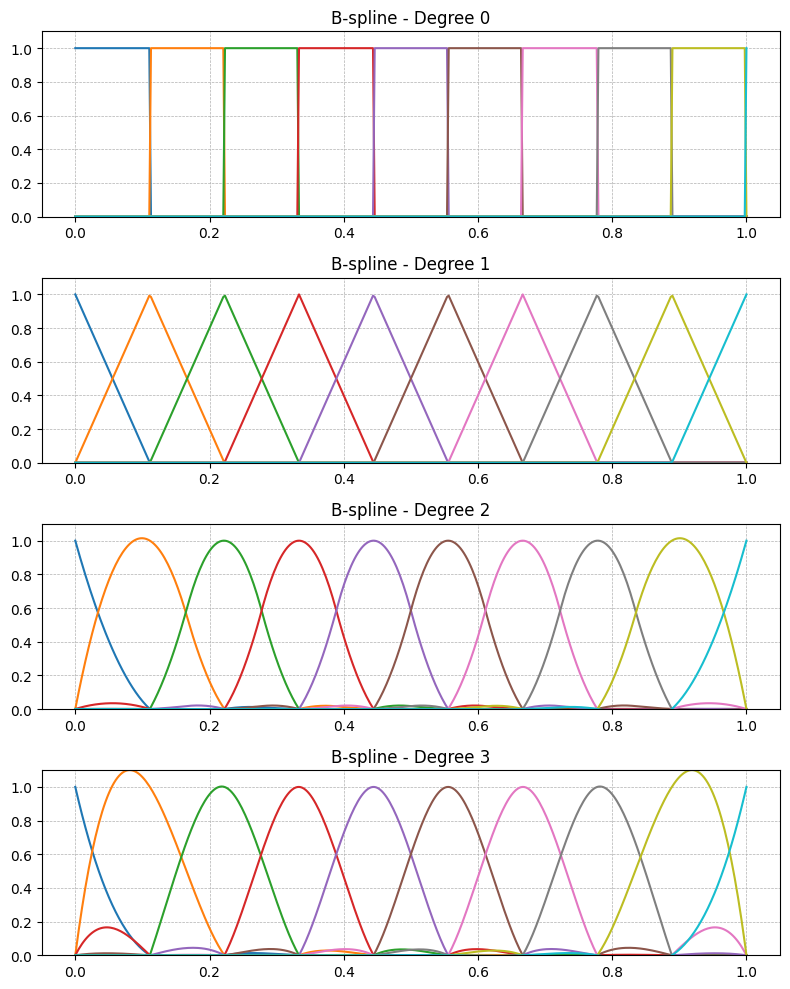

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline, make_interp_spline

# Create the knots and the x values for evaluation
knots = np.linspace(0, 1, 10)
x = np.linspace(0, 1, 400)

fig, axes = plt.subplots(4, 1, figsize=(8, 10))

for i, degree in enumerate([0, 1, 2, 3]):
    # For each knot, create and plot a B-spline basis function
    for k in knots:
        # Construct a B-spline
        coeffs = [1 if j == k else 0 for j in knots]
        spline = make_interp_spline(knots, coeffs, k=degree)

        y = spline(x)

        axes[i].plot(x, y, label=f'Knot at x={k:.2f}')
        axes[i].set_title(f"B-spline - Degree {degree}")
        axes[i].grid(True, which='both', linestyle='--', linewidth=0.5)
        axes[i].set_ylim(0, 1.1)

    # Uncomment the next line if you want to see the legend (might clutter the view)
    # axes[i].legend(fontsize=6)

plt.tight_layout()
plt.show()

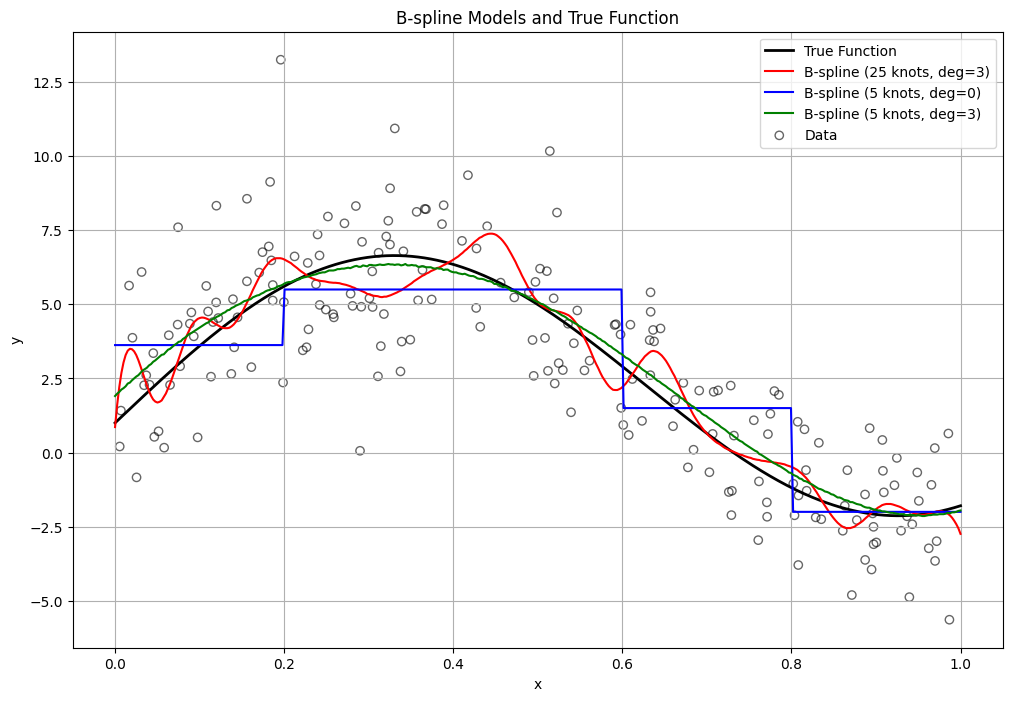

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrix
from sklearn.linear_model import LinearRegression

# Define the true function and data generating functions
def f(x):
    return 1 + 2 * x + 5 * np.sin(5 * x)

def sim_x(n):
    return np.random.random(n)

def sim_y(x, sd=2):
    return f(x) + np.random.normal(0, sd, len(x))

# Simulate the data
np.random.seed(42)
n = 200
x = sim_x(n)
y = sim_y(x)

# Create B-spline basis matrices for the models
X_25_knots = dmatrix("bs(x, df=25, degree=3, include_intercept=True)", {"x": x})
X_5_knots_deg0 = dmatrix("bs(x, df=5, degree=0, include_intercept=True)", {"x": x})
X_5_knots_deg3 = dmatrix("bs(x, df=5, degree=3, include_intercept=True)", {"x": x})

# Fit the linear regression models
reg_25_knots = LinearRegression().fit(X_25_knots, y)
reg_5_knots_deg0 = LinearRegression().fit(X_5_knots_deg0, y)
reg_5_knots_deg3 = LinearRegression().fit(X_5_knots_deg3, y)

# Predictions for plotting
x_range = np.linspace(0, 1, 400)
X_range_25_knots = dmatrix("bs(x_range, df=25, degree=3, include_intercept=True)", {"x_range": x_range})
X_range_5_knots_deg0 = dmatrix("bs(x_range, df=5, degree=0, include_intercept=True)", {"x_range": x_range})
X_range_5_knots_deg3 = dmatrix("bs(x_range, df=5, degree=3, include_intercept=True)", {"x_range": x_range})

y_pred_25_knots = reg_25_knots.predict(X_range_25_knots)
y_pred_5_knots_deg0 = reg_5_knots_deg0.predict(X_range_5_knots_deg0)
y_pred_5_knots_deg3 = reg_5_knots_deg3.predict(X_range_5_knots_deg3)

# Plot the true function and predictions from the three models
plt.figure(figsize=(12, 8))

plt.plot(x_range, f(x_range), 'k-', label="True Function", linewidth=2)
plt.plot(x_range, y_pred_25_knots, 'r-', label="B-spline (25 knots, deg=3)")
plt.plot(x_range, y_pred_5_knots_deg0, 'b-', label="B-spline (5 knots, deg=0)")
plt.plot(x_range, y_pred_5_knots_deg3, 'g-', label="B-spline (5 knots, deg=3)")

plt.scatter(x, y, alpha=0.6, facecolors='none', edgecolors='k', label="Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("B-spline Models and True Function")
plt.grid(True)
plt.show()

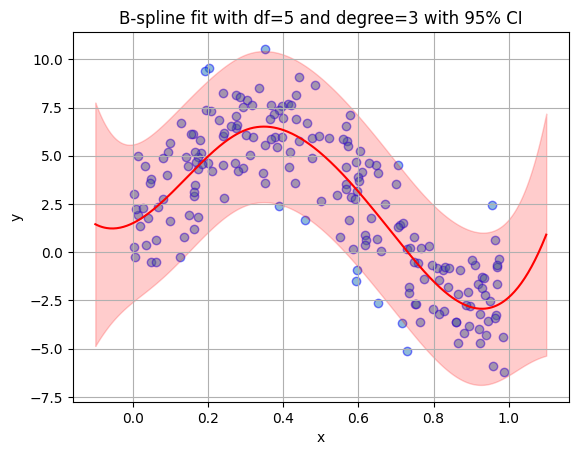

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from patsy import dmatrix

# Assuming sim_x and sim_y functions have been defined and data is generated:
n = 200
x = sim_x(n)
y = sim_y(x, 2)
data_train = pd.DataFrame({'x': x.flatten(), 'y': y.flatten()})

# Create B-spline basis matrix
X_bs = dmatrix("bs(data_train.x, df=5, degree=3, include_intercept=False, "
               "lower_bound=-0.2, upper_bound=1.2)", {"data_train.x": data_train.x})

# Fit the model
model_bs = sm.OLS(data_train.y, X_bs).fit()

# Plot the data
plt.scatter(data_train.x, data_train.y, edgecolor='blue', alpha=0.5)

# Plot the B-spline fit and its 95% confidence interval
x_range = np.linspace(-0.1, 1.1, 400)
X_range_bs = dmatrix("bs(x_range, df=5, degree=3, include_intercept=False, "
                     "lower_bound=-0.2, upper_bound=1.2)", {"x_range": x_range})

# Prediction with confidence interval
predictions = model_bs.get_prediction(X_range_bs)
pred_df = predictions.summary_frame(alpha=0.05)

# Extract upper and lower confidence limits
lower_bounds = pred_df['obs_ci_lower']
upper_bounds = pred_df['obs_ci_upper']

plt.plot(x_range, pred_df['mean'], color='red')
plt.fill_between(x_range, lower_bounds, upper_bounds, color='red', alpha=0.2)

plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.title('B-spline fit with df=5 and degree=3 with 95% CI')
plt.show()


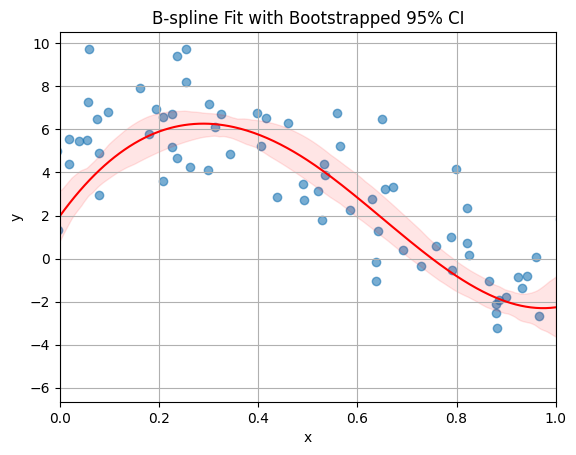

In [90]:
import numpy as np
import pandas as pd
from patsy import dmatrix
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Given: sim_x and sim_y functions
np.random.seed(42)
n = 100
x_values = sim_x(n)
y_values = sim_y(x_values)

# Domain adjustments using boundary knots
boundary_knots = [-0.2, 1.2]
adjusted_x_values = x_values * (boundary_knots[1] - boundary_knots[0]) + boundary_knots[0]
data_train = pd.DataFrame({'x': adjusted_x_values, 'y': y_values})

# Evaluation points
data_eval = pd.DataFrame({'x': np.linspace(0, 1, 300)})

# Initialize matrix for fitted values
M = 100
YHAT = np.empty((len(data_eval), M))

# Bootstrap CI (Percentile Method)
for m in range(M):
    # Sample from empirical distribution
    sample_indices = np.random.choice(len(data_train), size=len(data_train), replace=True)
    sampled_x = adjusted_x_values[sample_indices]
    sampled_y = y_values[sample_indices]

    # Create spline matrix for sampled data
    X_sample_bs = dmatrix("bs(sampled_x, df=5, degree=3, include_intercept=True)", {"sampled_x": sampled_x})

    # Fit model to bootstrap data
    model_bs = LinearRegression(fit_intercept=False).fit(X_sample_bs, sampled_y)

    # Predict from bootstrap model
    X_eval_bs = dmatrix("bs(data_eval.x, df=5, degree=3, include_intercept=True)", {"data_eval.x": data_eval.x})
    YHAT[:, m] = model_bs.predict(X_eval_bs)

# Calculate lower and upper percentiles
lower_bound = np.percentile(YHAT, 2.5, axis=1)
upper_bound = np.percentile(YHAT, 97.5, axis=1)

# Plot
plt.scatter(data_train.x, data_train.y, alpha=0.6, label='Data')
plt.plot(data_eval.x, np.mean(YHAT, axis=1), color='red', label='B-spline fit')
plt.fill_between(data_eval.x, lower_bound, upper_bound, color='red', alpha=0.1)
plt.title('B-spline Fit with Bootstrapped 95% CI')
plt.grid()
plt.xlim([0, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()


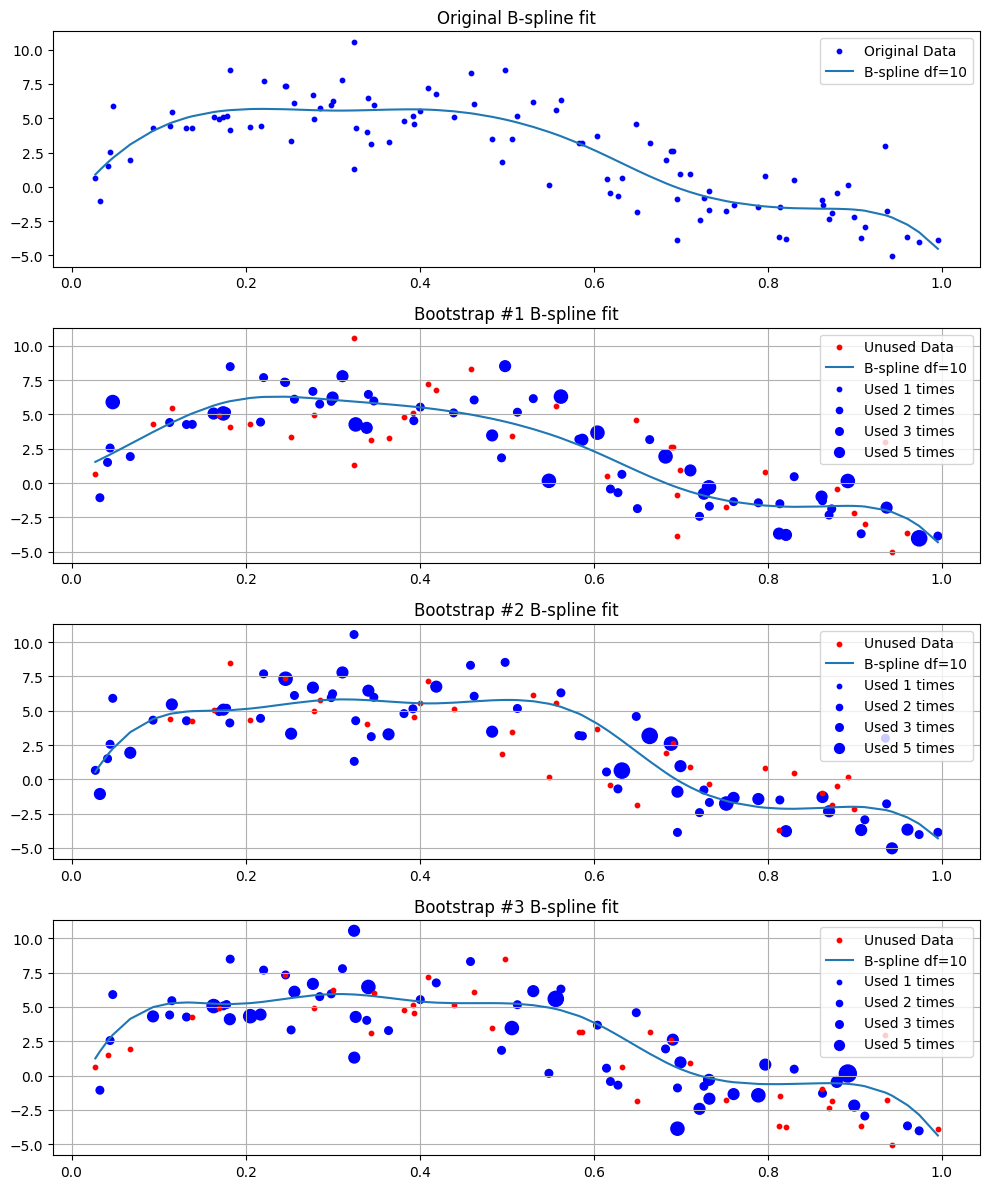

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from patsy import dmatrix
from sklearn.linear_model import LinearRegression

def sim_x(n):
    return np.random.random(n)

def sim_y(x, sd=2):
    return f(x) + np.random.normal(0, sd, len(x))

# Generate the initial data
n = 100
x= sim_x(n)
y= sim_y(x)

# Initialize the subplot
fig, axes = plt.subplots(4, 1, figsize=(10, 12))

# 1. Original B-spline fit using all data points
X_all = dmatrix("bs(x, df=10, degree=3, include_intercept=True)", {"x": x})
model_all = LinearRegression(fit_intercept=False).fit(X_all, y)
x_sorted_indices = np.argsort(x)
axes[0].scatter(x, y, color='blue', s=10, label='Original Data')
axes[0].plot(x[x_sorted_indices], model_all.predict(X_all)[x_sorted_indices], label='B-spline df=10')
axes[0].legend()
axes[0].set_title('Original B-spline fit')

# For legend representation
sizes_example = [1, 2, 3, 5]
labels = [f'Used {size} times' for size in sizes_example]

# 2. Bootstrapped data and fits
for i in range(1, 4):
    # Bootstrap sampling
    indices = np.random.choice(len(x), size=len(x), replace=True)

    # Frequency of each point in the bootstrap sample
    sizes = [list(indices).count(index) for index in range(len(x))]

    # Create masks for points that were and weren't used
    used_mask = np.array(sizes) > 0
    unused_mask = ~used_mask

    # B-spline fit for bootstrapped data
    X_bootstrap = dmatrix("bs(x, df=10, degree=3, include_intercept=True)", {"x": x[used_mask]})
    y_bootstrap = y[used_mask]
    model_bootstrap = LinearRegression(fit_intercept=False).fit(X_bootstrap, y_bootstrap)

    # Plot
    axes[i].scatter(x[used_mask], y[used_mask], c='blue', s=[s*30 for s in np.array(sizes)[used_mask]])
    axes[i].scatter(x[unused_mask], y[unused_mask], c='red', s=10, label='Unused Data')
    axes[i].plot(x[x_sorted_indices], model_bootstrap.predict(X_all)[x_sorted_indices], label='B-spline df=10')
    axes[i].set_title(f'Bootstrap #{i} B-spline fit')

    # Legend for scatter sizes
    for size, label in zip(sizes_example, labels):
        axes[i].scatter([], [], c='blue', s=size*10, label=label)

    axes[i].legend()
    axes[i].grid()

plt.tight_layout()

plt.show()


In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrix
from sklearn.linear_model import LinearRegression

def f(x):
    return 1 + 2 * x + 5 * np.sin(5 * x)

def sim_x(n):
    return np.random.random(n)

def sim_y(x, sd=2):
    return f(x) + np.random.normal(0, sd, len(x))

# Generate data
n = 100
x = sim_x(n)
y = sim_y(x,2)
data_train = pd.DataFrame({'x': x, 'y': y})

# Settings
M = 50  # number of bootstrap samples
DF = np.arange(3, 16, 1)  # edfs for spline
results = []  # initialize results list

# Set random seed for reproducibility
np.random.seed(321)

# Loop over M bootstraps
for m in range(1, M+1):
    # Sample with replacement
    ind = np.random.choice(n, size=n, replace=True)
    oob_ind = list(set(range(n)) - set(ind))

    # Fit B-spline models to all df in DF
    for df in DF:
        if len(oob_ind) < 1:
            continue

        # Create B-spline design matrix
        X_train_bs = dmatrix(f"bs(data_train['x'][ind], df={df}, include_intercept=False, lower_bound=-0.2, upper_bound=1.2)", data_train.iloc[ind])
        model = LinearRegression(fit_intercept=False).fit(X_train_bs, data_train['y'][ind])

        # Predict on OOB data
        X_oob_bs = dmatrix(f"bs(data_train['x'][oob_ind], df={df}, include_intercept=False, lower_bound=-0.2, upper_bound=1.2)", data_train.iloc[oob_ind])
        yhat_oob = model.predict(X_oob_bs)

        # Evaluate
        sse = np.sum((data_train['y'][oob_ind].values - yhat_oob)**2)
        n_oob = len(oob_ind)

        # Append results
        results.append({'m': m, 'df': df, 'sse': sse, 'n_oob': n_oob})

results_df = pd.DataFrame(results)
avg_mse = results_df.groupby('df').apply(lambda group: group['sse'].sum() / group['n_oob'].sum())


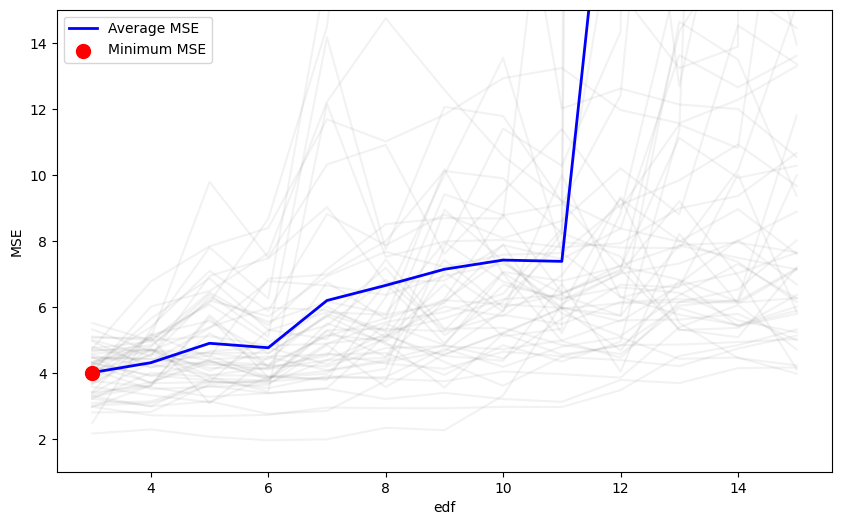

In [144]:
# Plot
plt.figure(figsize=(10,6))
for m, group in results_df.groupby('m'):
    plt.plot(group['df'], group['sse']/group['n_oob'], color='grey', alpha=0.1)

plt.plot(avg_mse.index, avg_mse.values, color='blue', linewidth=2, label='Average MSE')
plt.scatter(avg_mse.idxmin(), avg_mse.min(), color='red', s=100, zorder=5, label='Minimum MSE')
plt.xlabel("edf")
plt.ylabel("MSE")
plt.ylim([1,15])
plt.legend()
plt.show()

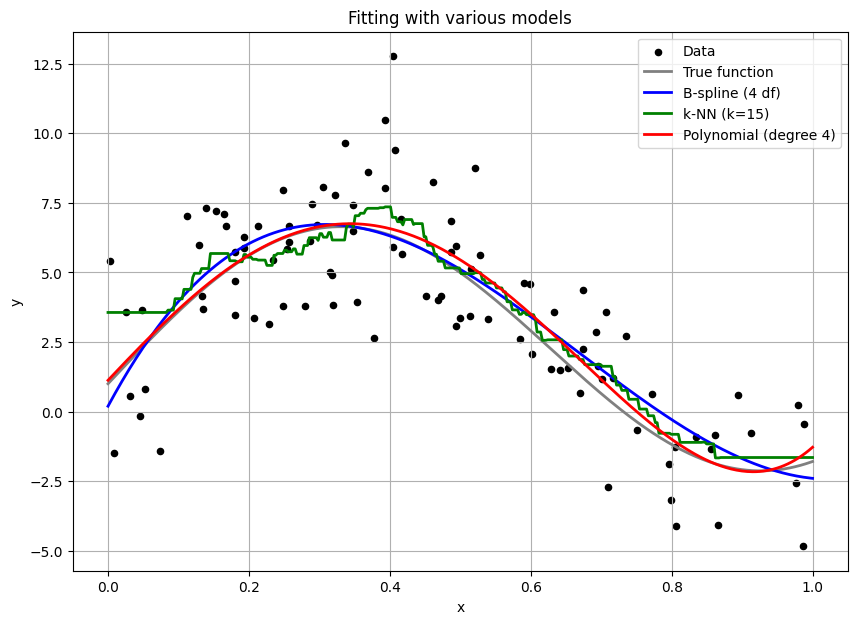

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from patsy import dmatrix

# Functions for data generation
def f(x):
    return 1 + 2 * x + 5 * np.sin(5 * x)

def sim_x(n):
    return np.random.random(n)

def sim_y(x, sd=2):
    return f(x) + np.random.normal(0, sd, len(x))

# Simulate data
n = 100
x = sim_x(n)
y = sim_y(x)

# B-spline fit
X_bspline = dmatrix("bs(x, df=4, include_intercept=True)", {"x": x})
bspline_reg = LinearRegression().fit(X_bspline, y)

# k-NN fit
knn_reg = KNeighborsRegressor(n_neighbors=15).fit(x.reshape(-1, 1), y)

# Polynomial fit
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(x.reshape(-1, 1))
poly_reg = LinearRegression().fit(X_poly, y)

# Generating predictions for a dense range
x_range = np.linspace(0, 1, 400)

# B-spline prediction on x_range
X_bspline_range = dmatrix("bs(x_range, df=4, include_intercept=True)", {"x_range": x_range})
bspline_fit_range = bspline_reg.predict(X_bspline_range)

# k-NN prediction on x_range
knn_fit_range = knn_reg.predict(x_range.reshape(-1, 1))

# Polynomial prediction on x_range
X_poly_range = poly.transform(x_range.reshape(-1, 1))
poly_fit_range = poly_reg.predict(X_poly_range)

# Plotting
plt.figure(figsize=(10, 7))
plt.scatter(x, y, color='black', s=20, label="Data")
plt.plot(x_range, f(x_range), color='gray', label="True function", linewidth=2)
plt.plot(x_range, bspline_fit_range, color='blue', label="B-spline (4 df)", linewidth=2)
plt.plot(x_range, knn_fit_range, color='green', label="k-NN (k=15)", linewidth=2)
plt.plot(x_range, poly_fit_range, color='red', label="Polynomial (degree 4)", linewidth=2)
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.title("Fitting with various models")
plt.show()
